# Hypotheses Testing
By Valeriya Vazhnova

## Introduction

In this project, we will run an A/B testing at a big online store and evaluate its results.

A list of hypotheses has already been prepared. First, we are going to prioritize them using the ICE/RICE method, and then test the most promising one.

Later we will calculate several important business metrics, including cumulative conversion, revenue and average order size, in order to evaluate the results of A/B testing. 

## <a id='cont'>Table of Contents</a>

**Part 1.** [Prioritizing the Hypotheses](#part1)

- [Calculating ICE](#part1ice)
- [Calculating RICE](#part1rice)

[*Conclusions to Part 1*](#part1concl)

**Part 2.** [Preprocessing the Results](#part2)

- [Orders](#part2orders)
- [Visits](#part2visits)

[*Conclusions to Part 2*](#part2concl)

**Part 3.** [Analyzing A/B Test Results](#part4)

- [Cumulative Revenue by Group](#part4rev)
- [Cumulative Average Order Size by Group](#part4order)
- [Cumulative Conversion Rate by Group](#part4conversion)
- [Number of Orders per User](#part3numberoforders)
- [Order Prices](#part3prices)
- [Statistical Significance of the Difference Between the Groups](#part4significance)
    - [Prepairing Raw Data](#part4raw)
    - [Raw Data: Conversion](#part4rawconversion)
    - [Raw Data: Average Order Size](#part4raworder)
    - [Filtered Data: Conversion](#part4filtconversion)
    - [Filtered Data: Average Order Size](#part4filtorder)
    
[*Conclusions to Part 3*](#part4concl)

[**General Conclusions**](#genconcl)

## <a>Part 1. Prioritizing the Hypotheses</a>

To start with, we are going to evaluate our hypotheses using two methods:
- ICE (its main parameters are Impact, Confidence & Effort);
-  RICE (Reach, Impact, Confidence & Effort).

This will help us identify the one hypothesis that is most likely to achieve the desired results.

In [1]:
# Importing libraries for working with dataframes and arrays
import pandas as pd
import numpy as np

# For avoiding warnings
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter('ignore')


In [2]:
try:
    hypotheses = pd.read_csv('/Users/lera/Documents/Personal/_Yandex practicum/4_studies/sprint 8_making business decisions/project/hypotheses_us.csv',
                            sep=';')
except:
    hypotheses = pd.read_csv('/datasets/hypotheses_us.csv',
                            sep=';')
    

In [3]:
hypotheses.info(memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 1.6 KB


In [4]:
hypotheses


,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


This is a small dataset and most of its columns seem to have the right type of content. We'll only have to rename its columns in uniform manner.

In [5]:
hypotheses.columns = hypotheses.columns.str.lower()


### <a id='part1ice'>Calculating ICE</a>

In [6]:
hypotheses['ICE'] = hypotheses.apply(lambda x: 
                                     round(x['impact'] * x['confidence'] / x['effort'], 2), axis=1)
hypotheses.sort_values(by='ICE', ascending=False)


,hypothesis,reach,impact,confidence,effort,ICE
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.20
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.33
7,Add a subscription form to all the main pages....,10,7,8,5,11.20
6,Show banners with current offers and sales on ...,5,3,8,3,8.00
2,Add product recommendation blocks to the store...,8,3,7,3,7.00
1,Launch your own delivery service. This will sh...,2,5,4,10,2.00
5,Add a customer review page. This will increase...,3,2,2,3,1.33
3,Change the category structure. This will incre...,8,3,3,8,1.12
4,Change the background color on the main page. ...,3,1,1,1,1.00


According to the ICE method, by far most promising hypotheses are #8, 0 and 7. What do they suggest?

In [7]:
print('Hypothesis 8: {}.'.format(hypotheses.iloc[8, 0]))
print('Hypothesis 0: {}.'.format(hypotheses.iloc[0, 0]))
print('Hypothesis 7: {}.'.format(hypotheses.iloc[7, 0]))


Hypothesis 8: Launch a promotion that gives users discounts on their birthdays.
Hypothesis 0: Add two new channels for attracting traffic. This will bring 30% more users.
Hypothesis 7: Add a subscription form to all the main pages. This will help you compile a mailing list.


[Back to Contents](#cont)

### <a id='part1rice'>Calculating RICE</a>

What happens if we take into account how many users these changes will affect (reach)?

In [8]:
hypotheses['RICE'] = hypotheses.apply(lambda x: 
                                      round(x['reach'] * x['impact'] * x['confidence'] / x['effort'], 2), 
                                      axis=1)
hypotheses.sort_values(by='RICE', ascending=False)

,hypothesis,reach,impact,confidence,effort,ICE,RICE
7,Add a subscription form to all the main pages....,10,7,8,5,11.20,112.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.00,56.0
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.33,40.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.00,40.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.20,16.2
3,Change the category structure. This will incre...,8,3,3,8,1.12,9.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.00,4.0
5,Add a customer review page. This will increase...,3,2,2,3,1.33,4.0
4,Change the background color on the main page. ...,3,1,1,1,1.00,3.0


This gives us somewhat different result. Now the most promising hypothesis is #7 (its RICE score is 112, which is literally twice higher than the one of its nearest competitor). Other hypotheses with relatively high scores are 2 (56 points), 0 and 6 (40 points both).

In [9]:
print('Hypothesis 7: {}.'.format(hypotheses.iloc[7, 0]))
print('Hypothesis 2: {}.'.format(hypotheses.iloc[2, 0]))
print('Hypothesis 0: {}.'.format(hypotheses.iloc[0, 0]))
print('Hypothesis 6: {}.'.format(hypotheses.iloc[6, 0]))


Hypothesis 7: Add a subscription form to all the main pages. This will help you compile a mailing list.
Hypothesis 2: Add product recommendation blocks to the store's site. This will increase conversion and average purchase size.
Hypothesis 0: Add two new channels for attracting traffic. This will bring 30% more users.
Hypothesis 6: Show banners with current offers and sales on the main page. This will boost conversion.


Looks like we have a clear winner: hypothesis number 7. Not only in was among the top-3 hypotheses by ICE parameter, but also it's been the most perspective by RICE parameter.

### <a id='part1concl'>Conclusions to Part 1</a>

So far we've singled out the most perspective hypothesis: to add a subscription form to all the main pages (hypothesis number seven). Later in will be subjected to A/B testing.

[Back to Contents](#cont)

## <a id='part2'>Part 2. Preprocessing the Results </a>

In this section of our project, we are going to download the information on website visits and orders during the A/B testing, clean and preprocess it.

### <a id='part2orders'>Orders</a>

In [10]:
# Downloading first 500 rows to assess the data 
try:
    orders = pd.read_csv('/Users/lera/Documents/Personal/_Yandex practicum/4_studies/sprint 8_making business decisions/project/orders_us.csv',
                     nrows=500)
except:
    orders = pd.read_csv('/datasets/orders_us.csv',
                     nrows=500)

In [11]:
orders.info(memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  500 non-null    int64  
 1   visitorId      500 non-null    int64  
 2   date           500 non-null    object 
 3   revenue        500 non-null    float64
 4   group          500 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 76.8 KB


In [12]:
orders.head()


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [13]:
# Downloading full dataset with the desired parameters
try:
    orders = pd.read_csv('/Users/lera/Documents/Personal/_Yandex practicum/4_studies/sprint 8_making business decisions/project/orders_us.csv',
                     dtype={'group':'category'},
                         parse_dates=['date'])
except:
    orders = pd.read_csv('/datasets/orders_us.csv',
                     dtype={'group':'category'},
                        parse_dates=['date'])

In [14]:
orders.info(memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 38.9 KB


In [15]:
# Renaming some columns in uniform manner
orders.rename(columns={'transactionId':'transaction_id', 'visitorId':'visitor_id'}, inplace=True)
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [16]:
orders[['transaction_id', 'visitor_id']].nunique()


transaction_id    1197
visitor_id        1031
dtype: int64

In [17]:
orders['date'].describe()


count                    1197
unique                     31
top       2019-08-05 00:00:00
freq                       48
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object

In [18]:
orders['revenue'].describe()


count     1197.000000
mean       131.491646
std        603.004729
min          5.000000
25%         20.800000
50%         50.200000
75%        130.400000
max      19920.400000
Name: revenue, dtype: float64

In [19]:
orders['group'].value_counts()


B    640
A    557
Name: group, dtype: int64

In [20]:
orders.duplicated().sum()


0

<a id='suspicious'></a>
This dataset has no missing values and no duplicates. We've learned that all the transactions have unique numbers, while some users made more than one order (which seems plausible).

The dataset contains information on one month (August 2018). When assessing the revenue, we've noticed that the difference between 75th percentile (130 USD) and the maximum order size (19,920 USD) is too big. We will address this issue a little later.

There is one more thing left to check: if both groups A and B have unique users.

In [21]:
group_A = orders.query('group == "A"')['visitor_id']
group_B = orders.query('group == "B"')['visitor_id']
twice = group_B[group_B.isin(group_A)]
twice.head()

20     963407295
23     351125977
24    3234906277
27     237748145
32    2038680547
Name: visitor_id, dtype: int64

In [22]:
print('{:} users ({:.2%} of the dataset) are listed in both groups!'.format(len(twice), len(twice) / len(orders)))

92 users (7.69% of the dataset) are listed in both groups!


That's a big number, so we'll have to report it to data engineers. Meanwhile we have no way of identifying these users correctly, so we'll have to filter them out.

In [23]:
orders_clean = orders[np.logical_not(orders.visitor_id.isin(twice))]
orders_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1016 non-null   int64         
 1   visitor_id      1016 non-null   int64         
 2   date            1016 non-null   datetime64[ns]
 3   revenue         1016 non-null   float64       
 4   group           1016 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 40.8 KB


We've cleaned the dataset, but before we proceed to analyzing A/B test results, let's also have a look at the data we've filtered out.

In [24]:
faulty_users = orders[orders.visitor_id.isin(twice)]

# Calculating number of transactions and total revenue for each user
faulty_users = (faulty_users
    .groupby('visitor_id')
    .agg({'transaction_id':'nunique', 'revenue':'sum'})
    .sort_values(by='transaction_id', ascending=False)
    .reset_index())
faulty_users.columns = ['visitor_id', 'n_purchases', 'total_revenue']
faulty_users.head(10)


,visitor_id,n_purchases,total_revenue
0,4256040402,11,2751.2
1,2458001652,11,990.3
2,2378935119,9,2230.1
3,2038680547,8,258.0
4,1230306981,5,496.3
5,237748145,5,182.2
6,3062433592,5,1182.9
7,199603092,5,367.6
8,3717692402,5,187.7
9,3803269165,5,187.1


It's a shame that some of the very active customers got in this list. They bring in a big number of orders and significant revenue. Their absence will undoubtedly influence our final results.

However, we have no way of determining to which group these users were assigned initially, so we'll have to sacrifice this data.

[Back to Contents](#cont)

### <a id='part2visits'>Visits</a>

In [25]:
# Downloading 500 rows to assess the data

try:
    visits = pd.read_csv('/Users/lera/Documents/Personal/_Yandex practicum/4_studies/sprint 8_making business decisions/project/visits_us.csv',
                     nrows=500)
except:
    visits = pd.read_csv('/datasets/visits_us.csv',
                     nrows=500)
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 8.7 KB


In [26]:
visits.head()


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [27]:
# Downloading the full dataset

try:
    visits = pd.read_csv('/datasets/visits_us.csv',
                        dtype={'group':'category'},
                        parse_dates=['date'])
except:
    visits = pd.read_csv('/Users/lera/Documents/Personal/_Yandex practicum/4_studies/sprint 8_making business decisions/project/visits_us.csv',
                        dtype={'group':'category'},
                        parse_dates=['date'])

In [28]:
visits.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     category      
 2   visits  62 non-null     int64         
dtypes: category(1), datetime64[ns](1), int64(1)
memory usage: 1.2 KB


In [29]:
visits['date'].describe()


count                      62
unique                     31
top       2019-08-02 00:00:00
freq                        2
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object

In [30]:
visits.group.value_counts()


B    31
A    31
Name: group, dtype: int64

In [31]:
visits.describe()


,visits
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


As we've learned, this dataset contains information about website visits from the users of both groups (A, B). The timeframe is the same as in the orders dataframe (August 2019), but each of the dates appears twice (with the number of visits for each of the two groups). Number of visits varies between 361 and 770 per day (for one group).

[Back to Contents](#cont)

### <a id='part2concl'> Conclusions to Part 2</a>

We've downloaded and preprocessed the data on website visits and orders.

Unfortunately, we've learned that orders dataset was faulty: 92 users were listed in both groups simultaneously. We had to subset this dataframe in order to filter them out. However, it means that we've lost some valuable information about their purchases.

We also should be aware that we have no way of filtering out these users from visits dataframe.

[Back to Contents](#cont)

## <a id='part4'>Part 3. Analyzing A/B Test Results</a>

Now it's time to calculate several important business metrics, which will help us assess the results of A/B testing.

In [32]:
# Importing libraries for plotting graphs

import plotly.graph_objects as go
import plotly.express as px


### <a id='part4rev'>Cumulative Revenue by Group</a>

When calculating cumulative revenue, we are going to start by plotting a graph based on the raw data. Then we'll compare it with the filtered data.

In [33]:
# RAW DATA
# t = total
# daily = daily orders
# c = cumulative
groups_raw = orders.pivot_table(index='date', columns='group', values='revenue', aggfunc=['sum', 'count'])
groups_raw.columns = ['t_rev_A', 't_rev_B', 'daily_A', 'daily_B']
groups_raw.reset_index(inplace=True)
groups_raw.head()

,date,t_rev_A,t_rev_B,daily_A,daily_B
0,2019-08-01,2356.8,1620.0,24,21
1,2019-08-02,1503.5,2623.8,20,24
2,2019-08-03,1815.2,1806.8,24,16
3,2019-08-04,1146.6,1717.3,16,17
4,2019-08-05,1988.1,1495.0,25,23


In [34]:
# Calculating cumulative revenue and cumulative number of orders
groups_raw[['c_rev_A', 'c_rev_B',
            'c_orders_A','c_orders_B']] = groups_raw[['t_rev_A',
                                                      't_rev_B', 'daily_A', 'daily_B']].cumsum()
# Calculating cumulative average order size
groups_raw['avg_order_A'] = groups_raw['c_rev_A'] / groups_raw['c_orders_A']
groups_raw['avg_order_B'] = groups_raw['c_rev_B'] / groups_raw['c_orders_B']

groups_raw = groups_raw.round(2)
groups_raw.head()


,date,t_rev_A,t_rev_B,daily_A,daily_B,c_rev_A,c_rev_B,c_orders_A,c_orders_B,avg_order_A,avg_order_B
0,2019-08-01,2356.8,1620.0,24,21,2356.8,1620.0,24,21,98.20,77.14
1,2019-08-02,1503.5,2623.8,20,24,3860.3,4243.8,44,45,87.73,94.31
2,2019-08-03,1815.2,1806.8,24,16,5675.5,6050.6,68,61,83.46,99.19
3,2019-08-04,1146.6,1717.3,16,17,6822.1,7767.9,84,78,81.22,99.59
4,2019-08-05,1988.1,1495.0,25,23,8810.2,9262.9,109,101,80.83,91.71


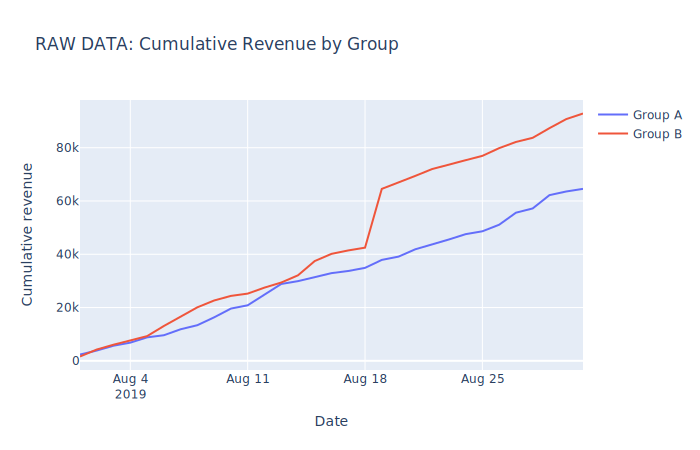

In [35]:
revenue_raw = go.Figure()

revenue_raw.add_trace(go.Scatter(
    x=groups_raw['date'],
    y=groups_raw['c_rev_A'],
    name="Group A"
))

revenue_raw.add_trace(go.Scatter(
    x=groups_raw['date'],
    y=groups_raw['c_rev_B'],
    name="Group B"
))

revenue_raw.update_layout(title='RAW DATA: Cumulative Revenue by Group',
                      xaxis_title='Date',
                      yaxis_title='Cumulative revenue')
revenue_raw.show('svg')


As we see from the graph based on raw data, throughout all the month group B was ahead of group A in terms of cumulative revenue. There is also a noticeable spike in revenue on August, 18-19 (only for group B, group A remained unchanged). It's worth checking what happened during these two days. Maybe website had some additional promotion, and it skewed the data? Or some external event influenced purchases? Or traffic splitting wasn't working that well?

Let's check if this trend appears in the filtered data.

In [36]:
# FILTERED DATA
# t = total
# daily = daily orders
# c = cumulative
groups = orders_clean.pivot_table(index='date', columns='group', values='revenue', aggfunc=['sum', 'count'])
groups.columns = ['t_rev_A', 't_rev_B', 'daily_A', 'daily_B']
groups.reset_index(inplace=True)
groups.head()

,date,t_rev_A,t_rev_B,daily_A,daily_B
0,2019-08-01,2266.6,967.2,23,17
1,2019-08-02,1468.3,2568.1,19,23
2,2019-08-03,1815.2,1071.6,24,14
3,2019-08-04,675.5,1531.6,11,14
4,2019-08-05,1398.0,1449.3,22,21


In [37]:
# Calculating cumulative revenue and cumulative number of orders
groups[['c_rev_A', 'c_rev_B',
            'c_orders_A','c_orders_B']] = groups[['t_rev_A', 't_rev_B',
                                                                       'daily_A',
                                                                      'daily_B']].cumsum()
# Calculating cumulative average order size
groups['avg_order_A'] = groups['c_rev_A'] / groups['c_orders_A']
groups['avg_order_B'] = groups['c_rev_B'] / groups['c_orders_B']

groups = groups.round(2)
groups.head()


,date,t_rev_A,t_rev_B,daily_A,daily_B,c_rev_A,c_rev_B,c_orders_A,c_orders_B,avg_order_A,avg_order_B
0,2019-08-01,2266.6,967.2,23,17,2266.6,967.2,23,17,98.55,56.89
1,2019-08-02,1468.3,2568.1,19,23,3734.9,3535.3,42,40,88.93,88.38
2,2019-08-03,1815.2,1071.6,24,14,5550.1,4606.9,66,54,84.09,85.31
3,2019-08-04,675.5,1531.6,11,14,6225.6,6138.5,77,68,80.85,90.27
4,2019-08-05,1398.0,1449.3,22,21,7623.6,7587.8,99,89,77.01,85.26


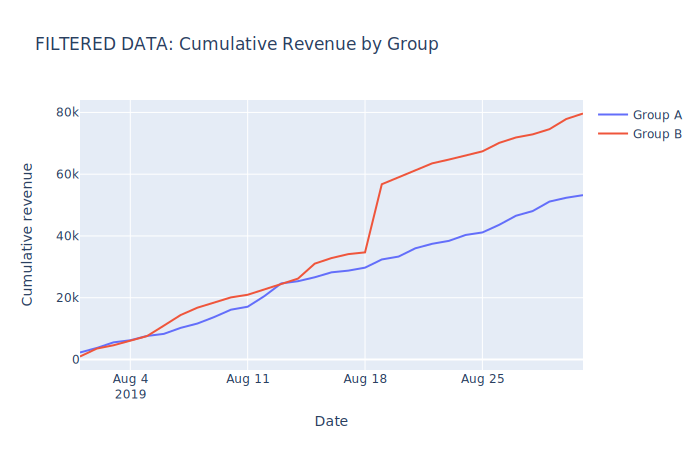

In [38]:
revenue_filt = go.Figure()

revenue_filt.add_trace(go.Scatter(
    x=groups['date'],
    y=groups['c_rev_A'],
    name="Group A"
))

revenue_filt.add_trace(go.Scatter(
    x=groups['date'],
    y=groups['c_rev_B'],
    name="Group B"
))

revenue_filt.update_layout(title='FILTERED DATA: Cumulative Revenue by Group',
                      xaxis_title='Date',
                      yaxis_title='Cumulative revenue')
revenue_filt.show('svg')


Aparrently, all of our previous observations are true for the filtered data. We still see the spike on 18-19 August, after which the difference in cumulative revenue between groups A and B became even more distinct.

To make the picture even more clear, we should have a look at the relative difference between cumulative revenue of these two groups. 

In [39]:
# FILTERED DATA: Calculating relative difference in cumulative revenue
groups['revenue_diff'] = groups.apply(lambda x: round(x['c_rev_B']/x['c_rev_A']-1, 2), axis=1)
groups.head()


,date,t_rev_A,t_rev_B,daily_A,daily_B,c_rev_A,c_rev_B,c_orders_A,c_orders_B,avg_order_A,avg_order_B,revenue_diff
0,2019-08-01,2266.6,967.2,23,17,2266.6,967.2,23,17,98.55,56.89,-0.57
1,2019-08-02,1468.3,2568.1,19,23,3734.9,3535.3,42,40,88.93,88.38,-0.05
2,2019-08-03,1815.2,1071.6,24,14,5550.1,4606.9,66,54,84.09,85.31,-0.17
3,2019-08-04,675.5,1531.6,11,14,6225.6,6138.5,77,68,80.85,90.27,-0.01
4,2019-08-05,1398.0,1449.3,22,21,7623.6,7587.8,99,89,77.01,85.26,-0.00


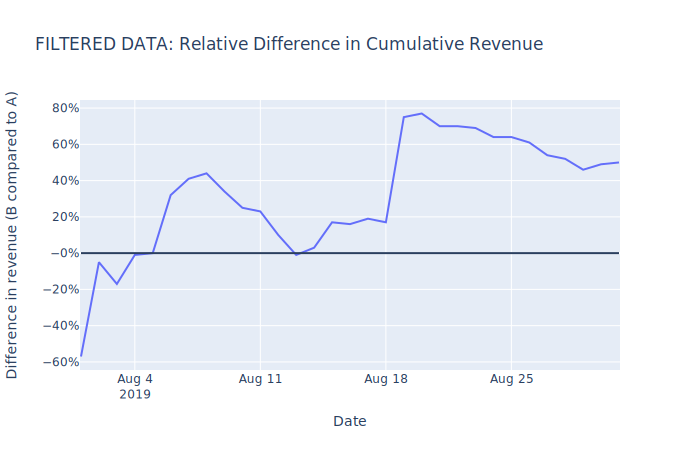

In [40]:
revenue_diff = px.line(groups, x='date', y='revenue_diff',
                   title='FILTERED DATA: Relative Difference in Cumulative Revenue',
                  labels=dict(date='Date', revenue_diff='Difference in revenue (B compared to A)'))
revenue_diff.update_layout(shapes=[dict(type='line', x0='2019-08-01',
                                   y0=0, x1='2019-08-31', y1=0)],
                      yaxis_tickformat='%')
revenue_diff.show('svg')

As we see, group B started with lower cumulative revenue, but by the 5th of August the difference disappeared. Since that date group B mostly has been ahead of group A, though there was a drop on the 13th of August.

The huge rize in group B's cumulative revenue is equally visible on this graph. During 18-19th of August the difference between the two groups reached 75%, though by the end of the month it stabilized on 50%.

[Back to Contents](#cont)

### <a id ='part4order'>Cumulative Average Order Size by Group</a>

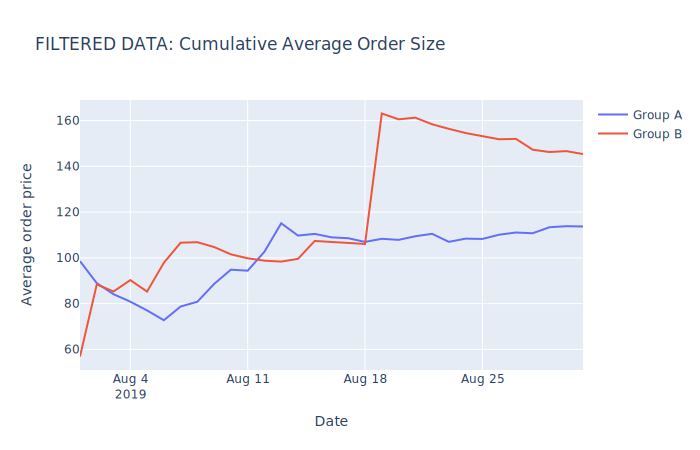

In [41]:
# We've already calculated cumulative average order size, so now we just need to plot the graphs
cumulative_avg_order_size = go.Figure()

cumulative_avg_order_size.add_trace(go.Scatter(
    x=groups['date'],
    y=groups['avg_order_A'],
    name="Group A"
))

cumulative_avg_order_size.add_trace(go.Scatter(
    x=groups['date'],
    y=groups['avg_order_B'],
    name="Group B"
))

cumulative_avg_order_size.update_layout(title='FILTERED DATA: Cumulative Average Order Size',
                      xaxis_title='Date',
                      yaxis_title='Average order price')
cumulative_avg_order_size.show('svg')


The lines on this graph are somewhat entangled, we can conclude that before the 18th of August cumulative average order sizes fluctuated. However, after the spike of 18-19th, average order size in the group B prevailed heavily over average order size in the group A. 

Let's have a look at the relative difference graph.

In [42]:
# FILTERED DATA: Calculating relative difference in cumulative revenue
groups['order_diff'] = groups.apply(lambda x: round(x['avg_order_B']/x['avg_order_A']-1, 2), axis=1)
groups.head()

,date,t_rev_A,t_rev_B,daily_A,daily_B,c_rev_A,c_rev_B,c_orders_A,c_orders_B,avg_order_A,avg_order_B,revenue_diff,order_diff
0,2019-08-01,2266.6,967.2,23,17,2266.6,967.2,23,17,98.55,56.89,-0.57,-0.42
1,2019-08-02,1468.3,2568.1,19,23,3734.9,3535.3,42,40,88.93,88.38,-0.05,-0.01
2,2019-08-03,1815.2,1071.6,24,14,5550.1,4606.9,66,54,84.09,85.31,-0.17,0.01
3,2019-08-04,675.5,1531.6,11,14,6225.6,6138.5,77,68,80.85,90.27,-0.01,0.12
4,2019-08-05,1398.0,1449.3,22,21,7623.6,7587.8,99,89,77.01,85.26,-0.00,0.11


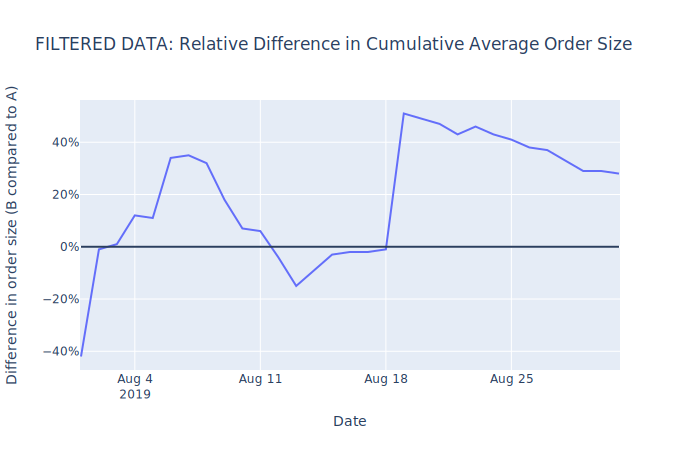

In [43]:
order_diff = px.line(groups, x='date', y='order_diff',
                   title='FILTERED DATA: Relative Difference in Cumulative Average Order Size',
                  labels=dict(date='Date', order_diff='Difference in order size (B compared to A)'))
order_diff.update_layout(shapes=[dict(type='line', x0='2019-08-01',
                                   y0=0, x1='2019-08-31', y1=0)],
                      yaxis_tickformat='%')
order_diff.show('svg')

Clearly, this parameter has been fluctuating, so we'll address this matter causiously.

It seems that during most part of the observation period cumulative average order size for group B was larger than for group A. E.g. the relative difference graph is positive:

- between August, 2 and August, 11 (the difference up to 35%);
- since August, 18 and until the end of the month.

On its peak (August, 19) the difference reached 51%, but by the end of the observation period it settled on 28%.

[Back to Contents](#cont)

### <a id='part4conversion'>Cumulative Conversion Rate by Group</a>

Though the task was to calculate daily conversion rate, we've decided to check cumulative conversion rate instead. The reason is, cumulative metrics are often more informative. They make tracking changes in experimental results easier: instead of paying attention to daily fluctuations of metrics, you see the dynamics of data for the whole period.

In [44]:
# Rearranging visits in order to merge them with groups
visits_info = visits.pivot(index='date', columns='group')
visits_info.columns = ['visits_A', 'visits_B']

# Calculating cumulative number of visits
visits_info[['c_visits_A', 'c_visits_B']] = visits_info[['visits_A', 'visits_B']].cumsum()
visits_info.reset_index(inplace=True)
visits_info.head()


,date,visits_A,visits_B,c_visits_A,c_visits_B
0,2019-08-01,719,713,719,713
1,2019-08-02,619,581,1338,1294
2,2019-08-03,507,509,1845,1803
3,2019-08-04,717,770,2562,2573
4,2019-08-05,756,707,3318,3280


In [45]:
# Merging two datasets

conversion = visits_info.merge(groups[['date', 'c_orders_A', 'c_orders_B']], on='date', how='left')
conversion.head()

,date,visits_A,visits_B,c_visits_A,c_visits_B,c_orders_A,c_orders_B
0,2019-08-01,719,713,719,713,23,17
1,2019-08-02,619,581,1338,1294,42,40
2,2019-08-03,507,509,1845,1803,66,54
3,2019-08-04,717,770,2562,2573,77,68
4,2019-08-05,756,707,3318,3280,99,89


We've checked that there was no mistake during the merging process and the resulting dataset contains no missing values:

In [46]:
conversion.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        31 non-null     datetime64[ns]
 1   visits_A    31 non-null     int64         
 2   visits_B    31 non-null     int64         
 3   c_visits_A  31 non-null     int64         
 4   c_visits_B  31 non-null     int64         
 5   c_orders_A  31 non-null     int64         
 6   c_orders_B  31 non-null     int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 1.9 KB


In [47]:
# Calculating conversion
conversion['c_conv_A'] = round(conversion['c_orders_A']/conversion['c_visits_A'], 3)
conversion['c_conv_B'] = round(conversion['c_orders_B']/conversion['c_visits_B'], 3)
conversion.head()


,date,visits_A,visits_B,c_visits_A,c_visits_B,c_orders_A,c_orders_B,c_conv_A,c_conv_B
0,2019-08-01,719,713,719,713,23,17,0.032,0.024
1,2019-08-02,619,581,1338,1294,42,40,0.031,0.031
2,2019-08-03,507,509,1845,1803,66,54,0.036,0.030
3,2019-08-04,717,770,2562,2573,77,68,0.030,0.026
4,2019-08-05,756,707,3318,3280,99,89,0.030,0.027


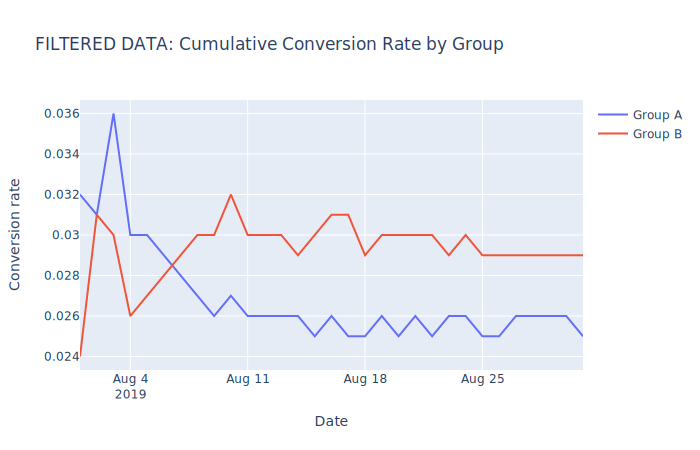

In [48]:
conversion_graph = go.Figure()

conversion_graph.add_trace(go.Scatter(
    x=conversion['date'],
    y=conversion['c_conv_A'],
    name="Group A"
))

conversion_graph.add_trace(go.Scatter(
    x=conversion['date'],
    y=conversion['c_conv_B'],
    name="Group B"
))

conversion_graph.update_layout(title='FILTERED DATA: Cumulative Conversion Rate by Group',
                      xaxis_title='Date',
                      yaxis_title='Conversion rate')
conversion_graph.show('svg')


Our graph is almost symmetrical!

It seems that in terms of cumulative conversion rate group B is showing better results than group A. It would be interesting to check the relative difference graph. 

In [49]:
conversion['relative_difference'] = round(conversion['c_conv_B']/conversion['c_conv_A']-1, 3)
conversion.head()


,date,visits_A,visits_B,c_visits_A,c_visits_B,c_orders_A,c_orders_B,c_conv_A,c_conv_B,relative_difference
0,2019-08-01,719,713,719,713,23,17,0.032,0.024,-0.250
1,2019-08-02,619,581,1338,1294,42,40,0.031,0.031,0.000
2,2019-08-03,507,509,1845,1803,66,54,0.036,0.030,-0.167
3,2019-08-04,717,770,2562,2573,77,68,0.030,0.026,-0.133
4,2019-08-05,756,707,3318,3280,99,89,0.030,0.027,-0.100


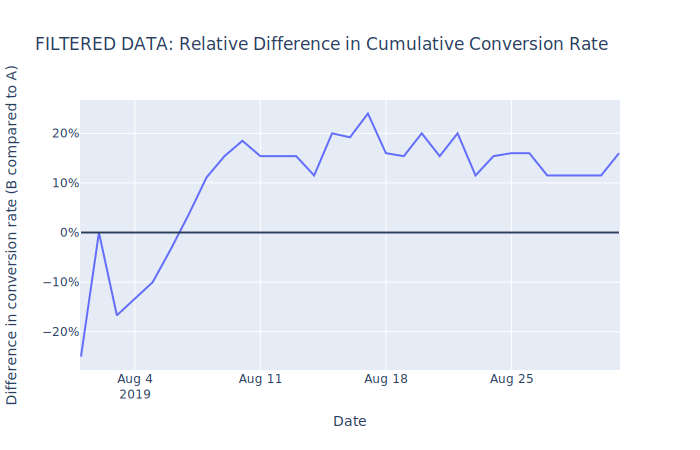

In [50]:
conversion_diff = px.line(conversion, x='date', y='relative_difference',
                   title='FILTERED DATA: Relative Difference in Cumulative Conversion Rate',
                  labels=dict(date='Date', relative_difference='Difference in conversion rate (B compared to A)'))
conversion_diff.update_layout(shapes=[dict(type='line', x0='2019-08-01',
                                   y0=0, x1='2019-08-31', y1=0)],
                      yaxis_tickformat='%')
conversion_diff.show('svg')

On this graph we clearly see relative difference between cumulative conversion in groups A and B. It seems that on average group B is performing much better. It started low, but reached group A very soon (August, 6-7) and since then has been constantly showing a better cumulative conversion rate. By the end of the month it showed 16% better conversion rate than group A. 

Interesting enough, there was no spike in cumulative conversion rate during the 18-19th of August.

[Back to Contents](#cont)

### <a id='part3numberoforders'>Number of Orders per User</a>

Our next task is to examine number of orders per user and try to detect anomalies. For this matter we are going to use scatter plot, calculations of 95th and 99th percentiles and a boxplot.

First, we are going to check the raw data, and afterwards we'll look at the filtered dataset (withot the users belonging to both groups).


In [51]:
orders_per_user_raw = orders.groupby('visitor_id').agg({'transaction_id':'nunique'}).reset_index()
orders_per_user_raw.columns = ['visitor_id', 'n_orders']
orders_per_user_raw.head()

,visitor_id,n_orders
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1


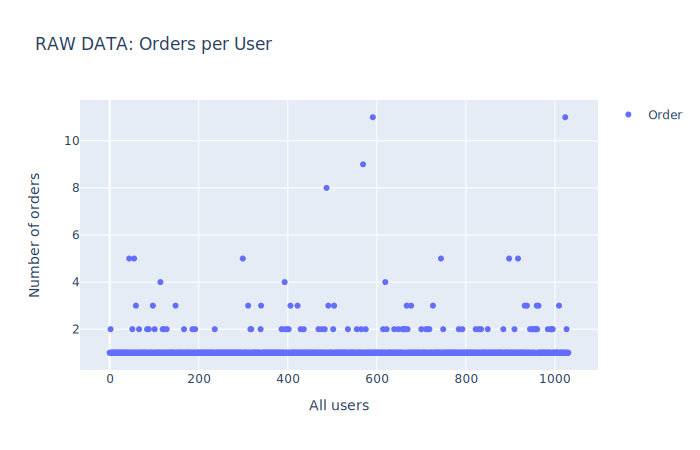

In [52]:
opu_raw = go.Figure()

opu_raw.add_trace(go.Scatter(y=orders_per_user_raw['n_orders'],
                    mode='markers',
                    name='Order'))
opu_raw.update_layout(title='RAW DATA: Orders per User',
                      xaxis_title='All users',
                      yaxis_title='Number of orders',
                       showlegend=True)
opu_raw.show('svg')

According to this scatterplot, the majority of users made only one order. There is also a significant number of users with two and three orders, but users with more orders are in fact pretty rare.

In [53]:
print('RAW DATA: Number of orders')
print('90th percentile: {:}'.format(np.percentile(orders_per_user_raw.n_orders, 90)))
print('95th percentile: {:}'.format(np.percentile(orders_per_user_raw.n_orders, 95)))
print('99th percentile: {:}'.format(np.percentile(orders_per_user_raw.n_orders, 99)))

RAW DATA: Number of orders
90th percentile: 1.0
95th percentile: 2.0
99th percentile: 4.0


Only 5% users made more than two orders, and only 1% more than four.

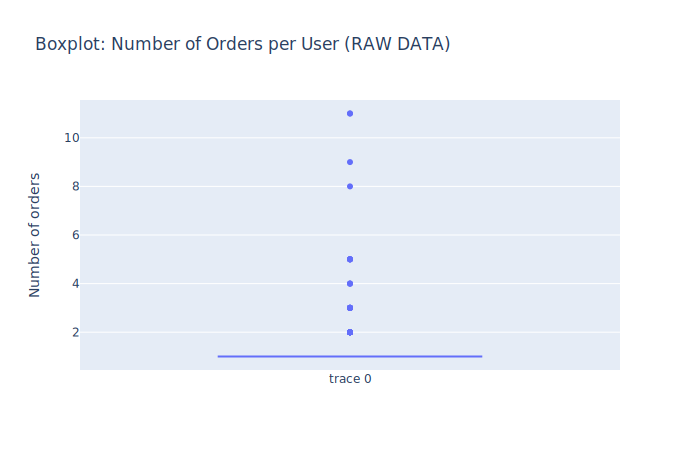

In [54]:
opu_box_graph = go.Figure()
opu_box_graph.add_trace(go.Box(y=orders_per_user_raw.n_orders))
opu_box_graph.update_layout(title='Boxplot: Number of Orders per User (RAW DATA)',
                           yaxis_title='Number of orders')
opu_box_graph.show('svg')

This boxplot lays even stricter rules: everything above one order is an outlier.

So let's have a look at the filtered data.

In [55]:
orders_per_user = orders_clean.groupby('visitor_id').agg({'transaction_id':'nunique'}).reset_index()
orders_per_user.columns = ['visitor_id', 'n_orders']
orders_per_user.head()

,visitor_id,n_orders
0,5114589,1
1,6958315,1
2,11685486,1
3,39475350,1
4,47206413,1


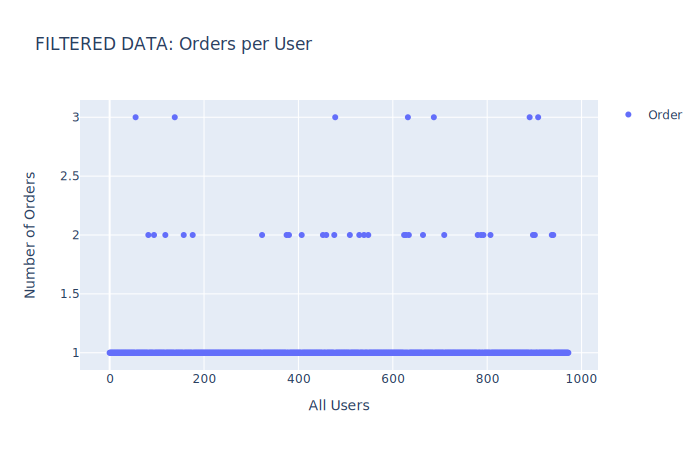

In [56]:
opu = go.Figure()

opu.add_trace(go.Scatter(y=orders_per_user['n_orders'],
                    mode='markers',
                    name='Order'))
opu.update_layout(title='FILTERED DATA: Orders per User',
                      xaxis_title='All Users',
                      yaxis_title='Number of Orders',
                       showlegend=True)
opu.show('svg')


In [57]:
print('FILTERED DATA: Number of orders')
print('90th percentile: {:}'.format(np.percentile(orders_per_user.n_orders, 90)))
print('95th percentile: {:}'.format(np.percentile(orders_per_user.n_orders, 95)))
print('99th percentile: {:}'.format(np.percentile(orders_per_user.n_orders, 99)))


FILTERED DATA: Number of orders
90th percentile: 1.0
95th percentile: 1.0
99th percentile: 2.0


In [58]:
print('{:.2%} of users made two orders'.format(len(orders_per_user.query('n_orders == 2')) / len(orders_per_user)))

2.98% of users made two orders


In [59]:
IQR = np.percentile(orders_per_user.n_orders, 75) - np.percentile(orders_per_user.n_orders, 25)
upper_fence = np.percentile(orders_per_user.n_orders, 75) + 1.5*IQR
print('Upper fence:', upper_fence)

Upper fence: 1.0


It seems that in terms of the number of orders per person we've already filtered out the most extreme cases (4-11 orders). However, strictly speaking anything above one order should be considered an anomaly, since 95% of the users made only one order. We've also backed our decision by calculating the interquartile range and the upper fence for the data distribution.

[Back to Contents](#cont)

### <a id='part3prices'>Order Prices</a>

[Earlier we've mentioned](#suspicious) that some of the orders seem suspiciously big because of the difference between 75th percentile (130 USD) and the maximum order size (19,920 USD). Now it's time to take a closer look at them and decide when data can be considered an anomaly.

Let's start with the raw data and then see if the result would change after we've filtered out users with multiple orders.



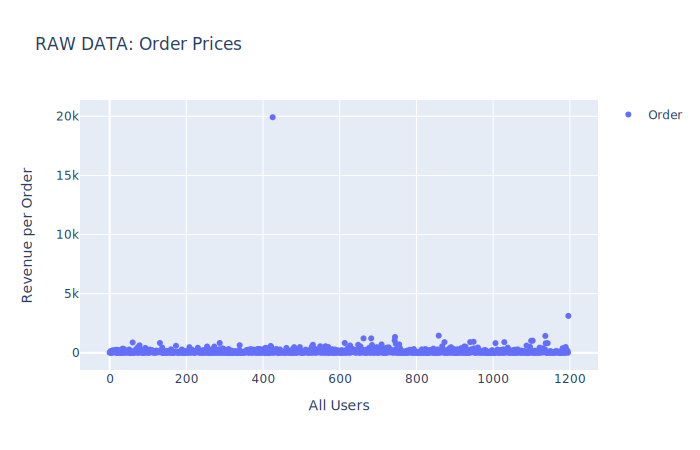

In [60]:
prices_raw = go.Figure()

prices_raw.add_trace(go.Scatter(y=orders['revenue'],
                    mode='markers',
                    name='Order'))
prices_raw.update_layout(title='RAW DATA: Order Prices',
                      xaxis_title='All Users',
                      yaxis_title='Revenue per Order',
                       showlegend=True)
prices_raw.show('svg')

On this scatter plot, most orders are depicted together. There are only two clear outliers.

In [61]:
print('RAW DATA: Order prices')
print('90th percentile: {:}'.format(round(np.percentile(orders.revenue, 90), 2)))
print('95th percentile: {:}'.format(round(np.percentile(orders.revenue, 95), 2)))
print('99th percentile: {:}'.format(round(np.percentile(orders.revenue, 99), 2)))

RAW DATA: Order prices
90th percentile: 282.48
95th percentile: 435.54
99th percentile: 900.9


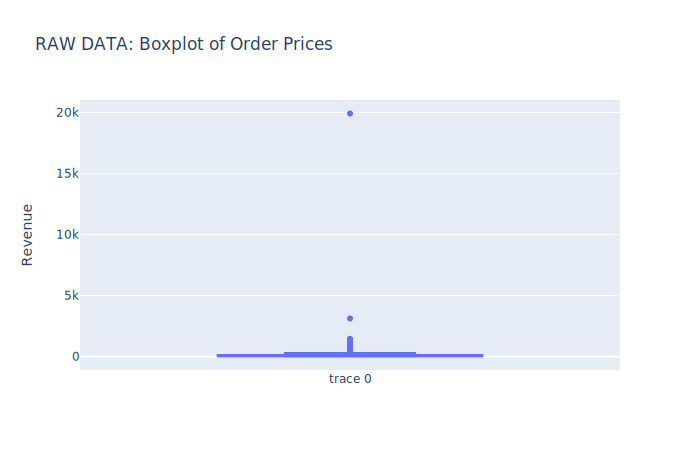

In [62]:
prices_box_graph = go.Figure()
prices_box_graph.add_trace(go.Box(y=orders.revenue))
prices_box_graph.update_layout(title='RAW DATA: Boxplot of Order Prices',
                              yaxis_title='Revenue')
prices_box_graph.show('svg')

The upper dot must represent a wholesale order. The upper fence on this graph is 290.5. This is slightly bigger than 90th percentile.

Now let's do the same steps for filtered data.

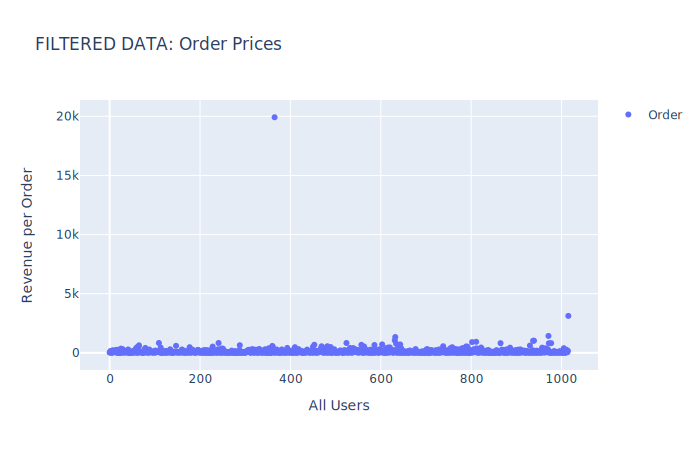

In [63]:
prices = go.Figure()

prices.add_trace(go.Scatter(y=orders_clean['revenue'],
                    mode='markers',
                    name='Order'))
prices.update_layout(title='FILTERED DATA: Order Prices',
                      xaxis_title='All Users',
                      yaxis_title='Revenue per Order',
                       showlegend=True)
prices.show('svg')


In [64]:
print('FILTERED DATA: Order prices')
print('90th percentile: {:}'.format(round(np.percentile(orders_clean.revenue, 90), 2)))
print('95th percentile: {:}'.format(round(np.percentile(orders_clean.revenue, 95), 2)))
print('99th percentile: {:}'.format(round(np.percentile(orders_clean.revenue, 99), 2)))


FILTERED DATA: Order prices
90th percentile: 280.8
95th percentile: 414.28
99th percentile: 830.3


In terms of order prices the situation didn't change much after we've filtered out the users which were attributed to both groups by mistake. 

Only 1% of users made orders worth more than 830 USD. So we suggest considering all orders above 830 USD anomalies.


[Back to Contents](#cont)

### <a id='part4significance'>Statistical Significance of the Difference Between the Groups</a>
Now we are going to check, if the difference in cumulative conversion rate and average order size between groups A and B is statistically significant or not with the help of Mann-Whitney test. We'll run it both on raw and filtered data and compare the results.

In [65]:
# Importing a library for statistical analysis
import scipy.stats as stats


#### <a id='part4raw'>Prepairing Raw Data</a>

Since we've worked only with filtered data throughout the project, we'll have to calculate conversion for the raw data.

In [66]:
groups_raw.head()

,date,t_rev_A,t_rev_B,daily_A,daily_B,c_rev_A,c_rev_B,c_orders_A,c_orders_B,avg_order_A,avg_order_B
0,2019-08-01,2356.8,1620.0,24,21,2356.8,1620.0,24,21,98.20,77.14
1,2019-08-02,1503.5,2623.8,20,24,3860.3,4243.8,44,45,87.73,94.31
2,2019-08-03,1815.2,1806.8,24,16,5675.5,6050.6,68,61,83.46,99.19
3,2019-08-04,1146.6,1717.3,16,17,6822.1,7767.9,84,78,81.22,99.59
4,2019-08-05,1988.1,1495.0,25,23,8810.2,9262.9,109,101,80.83,91.71


In [67]:
visits_info.head()

,date,visits_A,visits_B,c_visits_A,c_visits_B
0,2019-08-01,719,713,719,713
1,2019-08-02,619,581,1338,1294
2,2019-08-03,507,509,1845,1803
3,2019-08-04,717,770,2562,2573
4,2019-08-05,756,707,3318,3280


In [68]:
# RAW DATA: calculating cumulative conversion
conversion_raw = visits_info.merge(groups_raw[['date', 'c_orders_A', 'c_orders_B']])
conversion_raw['c_conv_A'] = round(conversion_raw['c_orders_A']/conversion_raw['c_visits_A'], 2)
conversion_raw['c_conv_B'] = round(conversion_raw['c_orders_B']/conversion_raw['c_visits_B'], 2)
conversion_raw.head()

,date,visits_A,visits_B,c_visits_A,c_visits_B,c_orders_A,c_orders_B,c_conv_A,c_conv_B
0,2019-08-01,719,713,719,713,24,21,0.03,0.03
1,2019-08-02,619,581,1338,1294,44,45,0.03,0.03
2,2019-08-03,507,509,1845,1803,68,61,0.04,0.03
3,2019-08-04,717,770,2562,2573,84,78,0.03,0.03
4,2019-08-05,756,707,3318,3280,109,101,0.03,0.03


[Back to Contents](#cont)

#### <a id='part4rawconversion'>Raw Data: Conversion</a>

**Null hypothesis:** there is no statistically significant difference between cumulative conversion rate in the groups A and B.

**Alternative hypothesis:** the difference between cumulative conversion rates in the groups A and B is statistically significant.

**Precision level (alpha):** 5%

In [69]:
alpha = 0.05

results_conv_raw = stats.mannwhitneyu(conversion_raw.c_conv_A, conversion_raw.c_conv_B)
print('p-value:', results_conv_raw.pvalue)

if results_conv_raw.pvalue < alpha:
    print('Null hypothesis rejected: the difference is statistically significant')
else:
    print("Failed to reject the null hypothesis: we can't make conclusions about the difference")

p-value: 0.045457418898898545
Null hypothesis rejected: the difference is statistically significant


[Back to Contents](#cont)

#### <a id='part4raworder'>Raw Data: Average Order Size</a>

Since previously we only used cumulative average order size, for this test we will have to calculate average order size separately.


In [70]:
# RAW DATA: calculating average order size
orders_avg_raw = orders.pivot_table(index='date', columns='group', values='revenue', aggfunc=['sum', 'count'])
orders_avg_raw.columns = ['total_A', 'total_B', 'n_orders_A', 'n_orders_B']
orders_avg_raw['avg_order_A'] = round(orders_avg_raw['total_A']/orders_avg_raw['n_orders_A'], 2)
orders_avg_raw['avg_order_B'] = round(orders_avg_raw['total_B']/orders_avg_raw['n_orders_B'], 2)
orders_avg_raw.head()

,total_A,total_B,n_orders_A,n_orders_B,avg_order_A,avg_order_B
date,,,,,,
2019-08-01,2356.8,1620.0,24,21,98.20,77.14
2019-08-02,1503.5,2623.8,20,24,75.18,109.32
2019-08-03,1815.2,1806.8,24,16,75.63,112.92
2019-08-04,1146.6,1717.3,16,17,71.66,101.02
2019-08-05,1988.1,1495.0,25,23,79.52,65.00



**Null hypothesis:** there is no statistically significant difference between average order size in the groups A and B.

**Alternative hypothesis:** the difference between average order size in the groups A and B is statistically significant.

**Precision level (alpha):** 5%

In [71]:
# Variable alpha has already been declared

results_order_raw = stats.mannwhitneyu(orders_avg_raw.avg_order_A, orders_avg_raw.avg_order_B)
print('p-value:', results_order_raw.pvalue)

if results_order_raw.pvalue < alpha:
    print('Null hypothesis rejected: the difference is statistically significant')
else:
    print("Failed to reject the null hypothesis: we can't make conclusions about the difference")

p-value: 0.2111380543234191
Failed to reject the null hypothesis: we can't make conclusions about the difference


[Back to Contents](#cont)

#### <a id='part4filtconversion'>Filtered Data: Conversion</a>

**Null hypothesis:** there is no statistically significant difference between cumulative conversion rate in the groups A and B.

**Alternative hypothesis:** the difference between cumulative conversion rate in the groups A and B is statistically significant.

**Level of precision (alpha):** 5%

In [72]:
conversion.head()

,date,visits_A,visits_B,c_visits_A,c_visits_B,c_orders_A,c_orders_B,c_conv_A,c_conv_B,relative_difference
0,2019-08-01,719,713,719,713,23,17,0.032,0.024,-0.250
1,2019-08-02,619,581,1338,1294,42,40,0.031,0.031,0.000
2,2019-08-03,507,509,1845,1803,66,54,0.036,0.030,-0.167
3,2019-08-04,717,770,2562,2573,77,68,0.030,0.026,-0.133
4,2019-08-05,756,707,3318,3280,99,89,0.030,0.027,-0.100


In [73]:
# Variable alpha has already been declared

results_conv_filt = stats.mannwhitneyu(conversion.c_conv_A, conversion.c_conv_B)
print('p-value:', results_conv_filt.pvalue)

if results_conv_filt.pvalue < alpha:
    print('Null hypothesis rejected: the difference is statistically significant')
else:
    print("Failed to reject the null hypothesis: we can't make conclusions about the difference")

p-value: 8.000380353802634e-06
Null hypothesis rejected: the difference is statistically significant


[Back to Contents](#cont)

#### <a id='part4filtorder'>Filtered Data: Average Order Size</a>

In [74]:
avg_order_filt = groups[['date', 't_rev_A', 't_rev_B', 'daily_A', 'daily_B']]
avg_order_filt['avg_order_A'] = round(avg_order_filt['t_rev_A']/avg_order_filt['daily_A'], 2)
avg_order_filt['avg_order_B'] = round(avg_order_filt['t_rev_B']/avg_order_filt['daily_B'], 2)
avg_order_filt.head()

,date,t_rev_A,t_rev_B,daily_A,daily_B,avg_order_A,avg_order_B
0,2019-08-01,2266.6,967.2,23,17,98.55,56.89
1,2019-08-02,1468.3,2568.1,19,23,77.28,111.66
2,2019-08-03,1815.2,1071.6,24,14,75.63,76.54
3,2019-08-04,675.5,1531.6,11,14,61.41,109.40
4,2019-08-05,1398.0,1449.3,22,21,63.55,69.01


**Null hypothesis:** there is no statistically significant difference between cumulative average order size in the groups A and B.

**Alternative hypothesis:** the difference between cumulative average order size in the groups A and B is statistically significant.

**Precision level (alpha):** 5%

In [75]:
# Variable alpha has already been declared

results_order_filt = stats.mannwhitneyu(avg_order_filt.avg_order_A, avg_order_filt.avg_order_B)
print('p-value:', results_order_filt.pvalue)

if results_order_filt.pvalue < alpha:
    print('Null hypothesis rejected: the difference is statistically significant')
else:
    print("Failed to reject the null hypothesis: we can't make conclusions about the difference")

p-value: 0.4775457158686006
Failed to reject the null hypothesis: we can't make conclusions about the difference


[Back to Contents](#cont)

### <a id='part4concl'>Conclusions to Part 3</a>

In this part of our project, we've calculated several metrics for each group, including:

- cumulative revenue;
- cumulative average order size;
- cumulative conversion rate.

We've also run Mann-Whitney test both on filtered and raw data to make sure that the difference we observe between groups A and B is statistically significant. Apparently, we've reached statictical significance of the difference in cumulative conversion, but not in average order size (these results are true both for raw and filtered data).

[Back to Contents](#cont)

## <a id='genconcl'>General Conclusions</a>

For this project, we've received a list of hypotheses which could potentially help us boost the sales. We chose two methods to evaluate them: ICE and RICE.

After [calculating ICE](#part1ice) (the score which measures impact, confidence and effort), we've been left with top-3 hypotheses. But [RICE score](#part1rice), which also takes reach into consideration, helped us single out one hypothesis that undoubtedly had the highest potential. 

It was **hypothesis #7**:

- Add a subscription form to all the main pages. This will help you compile a mailing list.


In [76]:
conversion_raw.query('date == "2019-08-31"')


,date,visits_A,visits_B,c_visits_A,c_visits_B,c_orders_A,c_orders_B,c_conv_A,c_conv_B
30,2019-08-31,699,718,18736,18916,557,640,0.03,0.03


The A/B testing was runnung **for a whole month** (August 2019). By the end of this period we've documented **18,736 website visitors from group A** and **18,916 visitors from group B**. The difference between the two groups is minimal (around 1%), so we'll consider these groups equal.

So it's time to review results of the experiment.

First of all, we can declare that our A/B testing **has reached statistical significance** if we compare **the difference in cumulative conversion rate** for groups A and B. However, the difference between average order size hasn't  reached statistical significance.

Unfortunately, the initial data we've recieved was faulty. **92 users were attributed to both groups**, including very active ones. We were afraid that would influence the results of the experiment. However, we've been comparing raw and filtered data during various stages of our research, and it seems that (contrary to our expectations) it hasn't seriously affected our data.

In order to evaluate the results, we've calculated several metrics:
- cumulative conversion rate;
- cumulative revenue;
- cumulative average order size.

We'll start by discussing the conversion of visits to purchases. Apparently, the **cumulative conversion rate in group B was 16% higher** than in group A. This is clearly visible from the following relative difference graph:


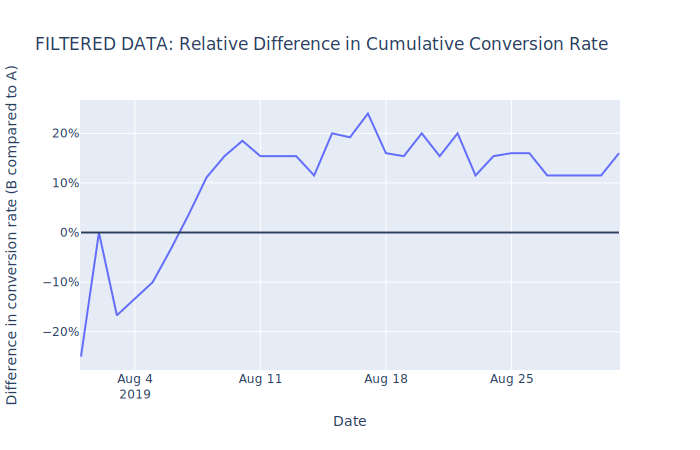

In [77]:
conversion_diff.show('svg')



Group B started low, but reached group A very soon (August, 6-7) and since then has been constantly showing a better conversion rate.

In terms of cumulative revenue, group B was ahead of group A throughout the entire month. We've also noticed a rapid increase in the revenue of group B during the 18-19th August. It's hard to explain the nature of this increase. It could be caused by external factors. However, we should definitely check if there were some unusual marketing or website activities during these two days.


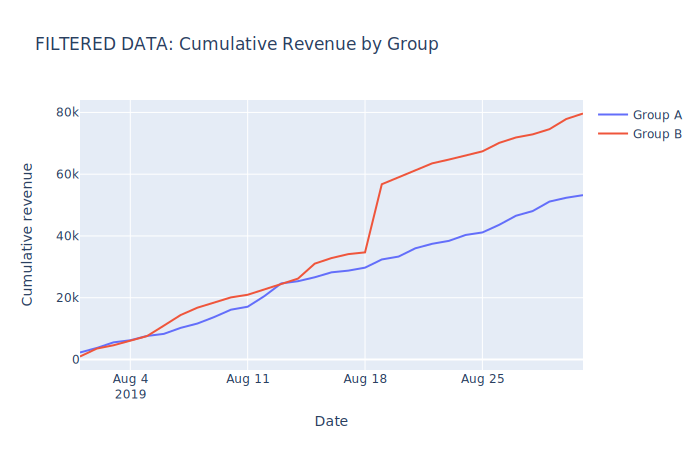

In [78]:
revenue_filt.show('svg')


We can also see this spike clearly on the relative difference graph. Overall group B showed higher cumulative revenue, and it ended the month 50% higher than group A.


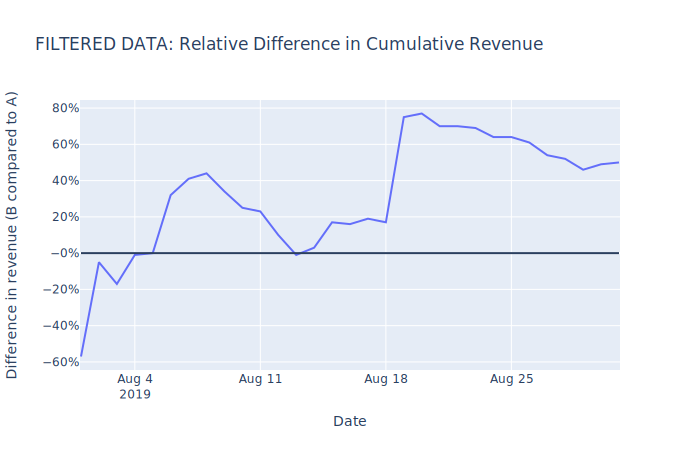

In [79]:
revenue_diff.show('svg')


And finally, let's take a look at the cumulative average order size. This value fluctuated during the entire month, and, as we remember, it hasn't reached statistical significance. So we will restrain ourselves from making any strong conclusions on this matter.

However, we would like to point out, that this graph depicts a spike on the 18-19th of August, too.


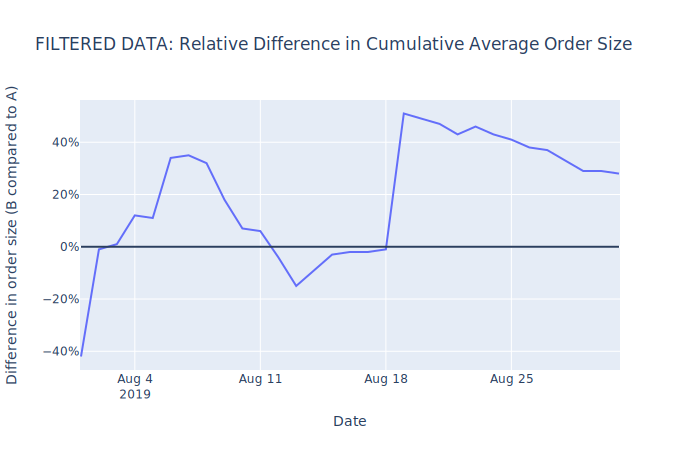

In [80]:
order_diff.show('svg')

To sum it up, we must admit that the experiment brought good results and can be stopped now. It seems that in general group B performed better than group A, including 16% rise in cumulative conversion rate and 50% rise in cumulative revenue. 


Since the changes in average order size weren't statistically significant, we can attribute revenue growth to the rise in the number of orders. Members of group B made 640 orders in total, while members of group A made 557. That was also reflected in the growth of conversion rate for group B.

So we suggest implementing the changes proposed in the hypothesis #7, which means adding subscritpion form to all of the website's main pages.

[Back to Contents](#cont)
